In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yeh-concret-data/Concrete_Data_Yeh.csv


* Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
* Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
* Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
* Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
* Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
* Age -- quantitative -- Day (1~365) -- Input Variable
* Concrete Compressive Strength -- quantitative -- MPa -- Output Variable

# Self practice

In [4]:
def load_data_csv_to_df():
    '''
    load the .csv data to a pandas df
    '''
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            file_path = os.path.join(dirname, filename)    
    csv_path  = file_path
    return pd.read_csv(csv_path)
    
    
concrete = load_data_csv_to_df()

In [5]:
df_concrete = concrete.copy()
df_concrete

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


rename columns

In [6]:
df_concrete = df_concrete.rename({'coarseaggregate':'coarse_aggr', 
                                  'fineaggregate':'fine_aggr',
                                 'csMPa':'CompStrength_MPa'}, axis=1)

In [7]:
# after rename
df_concrete

,cement,slag,flyash,water,superplasticizer,coarse_aggr,fine_aggr,age,CompStrength_MPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [8]:
df_concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_aggr       1030 non-null   float64
 6   fine_aggr         1030 non-null   float64
 7   age               1030 non-null   int64  
 8   CompStrength_MPa  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
# check for missing values (even though from .info() we dont see any missing values)
df_concrete.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarse_aggr         0
fine_aggr           0
age                 0
CompStrength_MPa    0
dtype: int64

In [10]:
# check for dtypes
df_concrete.dtypes.value_counts()

float64    8
int64      1
dtype: int64

### comment 
- 8 float
- 1 int64

In [11]:
df_concrete.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_aggr,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_aggr,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
CompStrength_MPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### use seaborn to plot 

***Plot the distribution of CompStrength_MPa***

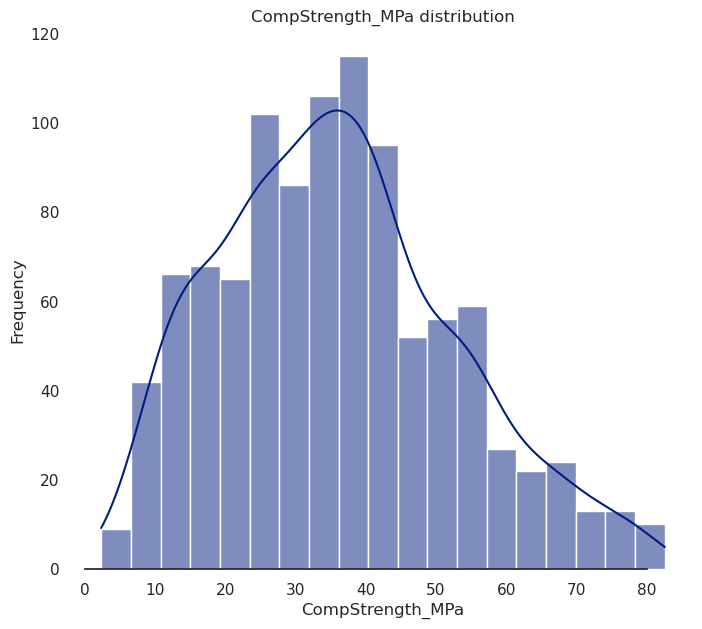

In [73]:
import seaborn as sns
# figure setup
sns.set_style("white")
sns.set_context("notebook")
sns.set_color_codes(palette='dark')
f, ax = plt.subplots(figsize=(8, 7))
# visualize the target
sns.histplot(df_concrete['CompStrength_MPa'], color='b', kde=True)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="CompStrength_MPa")
ax.set(title="CompStrength_MPa distribution")
sns.despine(trim=True, left=True)
plt.show()


***plot histograms***

<Figure size 2000x1500 with 0 Axes>

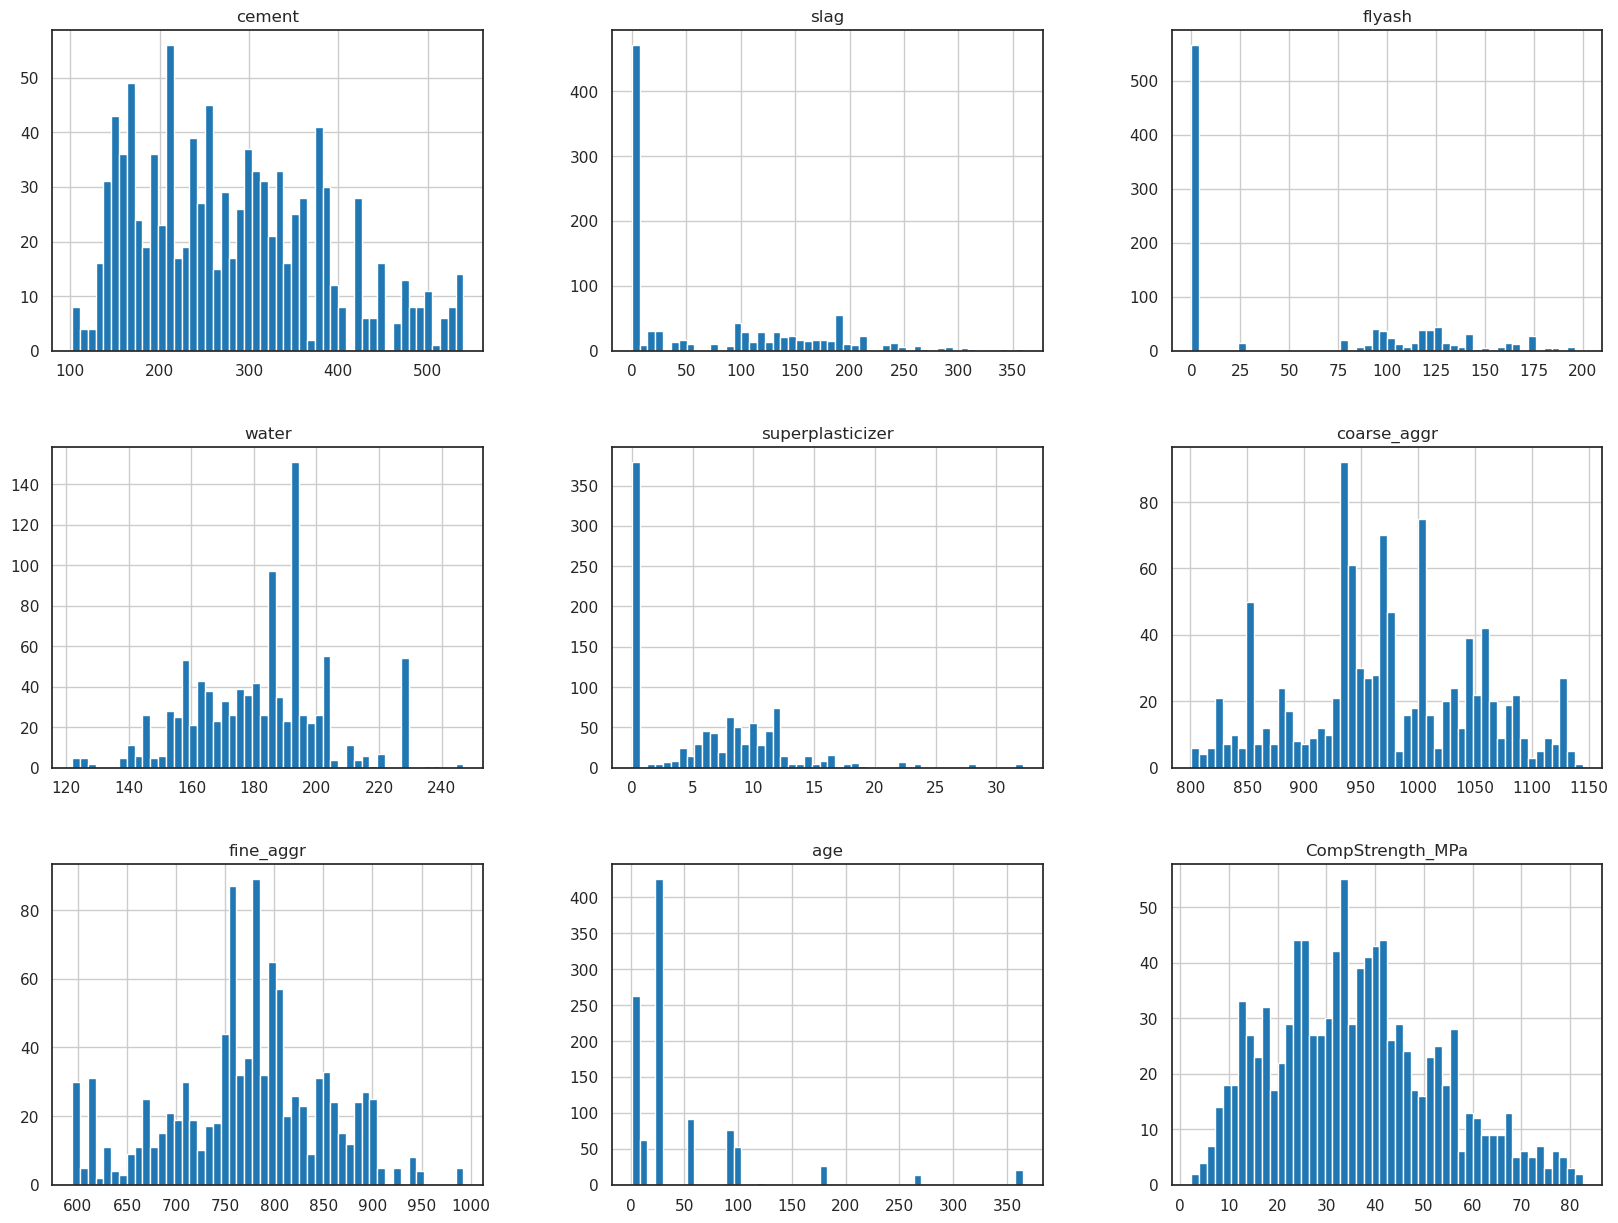

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
df_concrete.hist(bins=50, figsize=(20, 15))
# sns.displot(data=df_concrete)
plt.show()

***use seaborn to plot***

In [87]:
# for col in df_concrete:
#     sns.set_style("white")
#     sns.set_context("notebook")
#     sns.set_color_codes(palette='dark')
#     plt.figure(figsize=(10, 8))
# #     sns.displot(df_concrete[col], kind="kde")
#     sns.displot(df_concrete[col], color='b')
#     sns.despine(trim=True, left=True)
#     plt.ylabel('Frequency')
# plt.show()


**Relationship Between Each Variable and Target Variable (csMPa)**

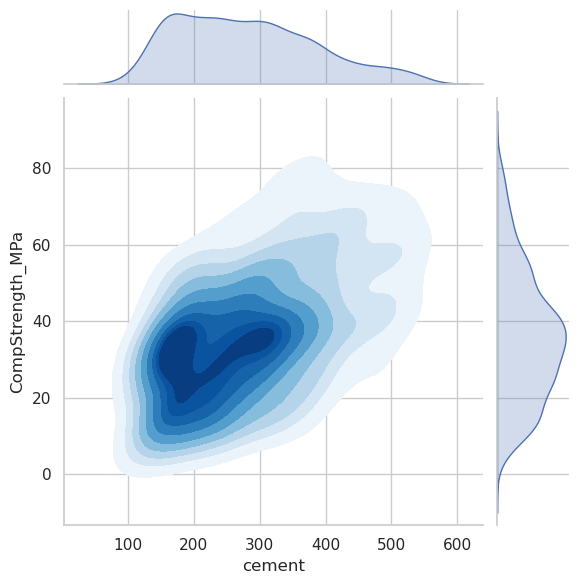

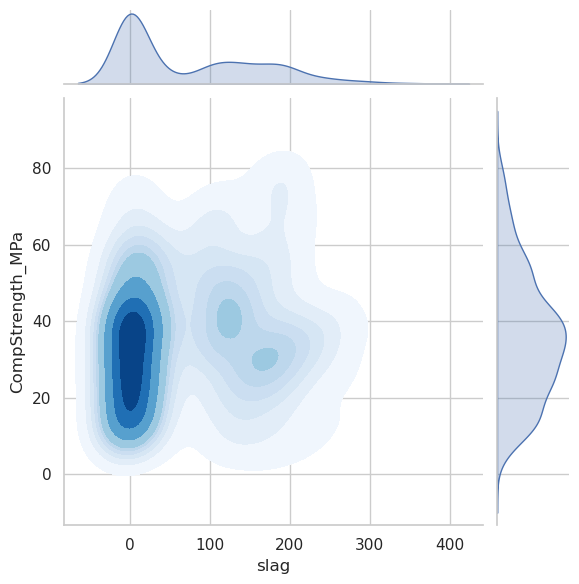

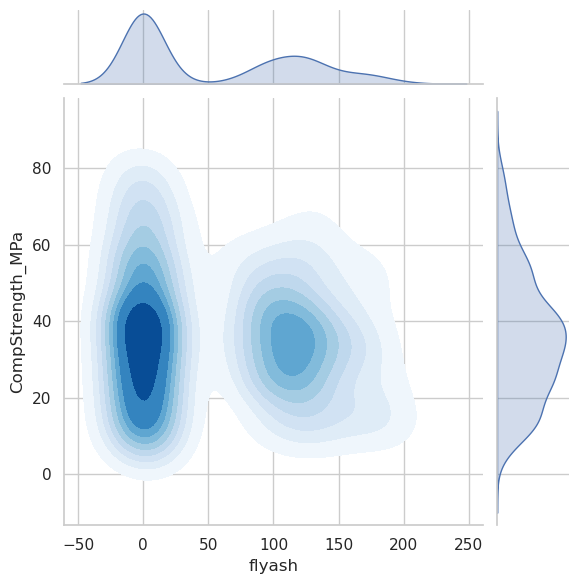

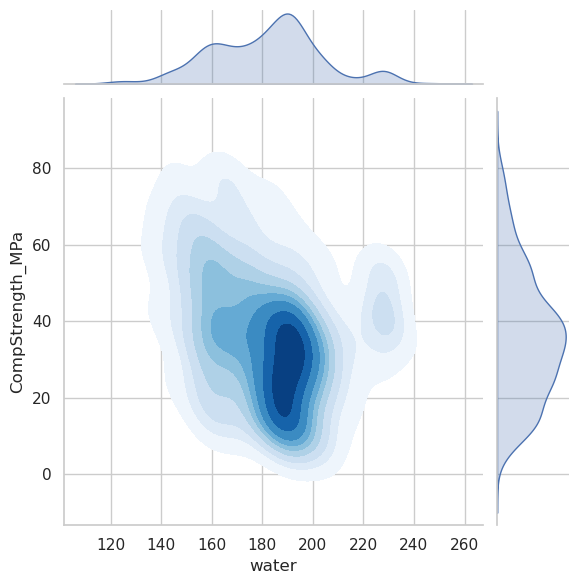

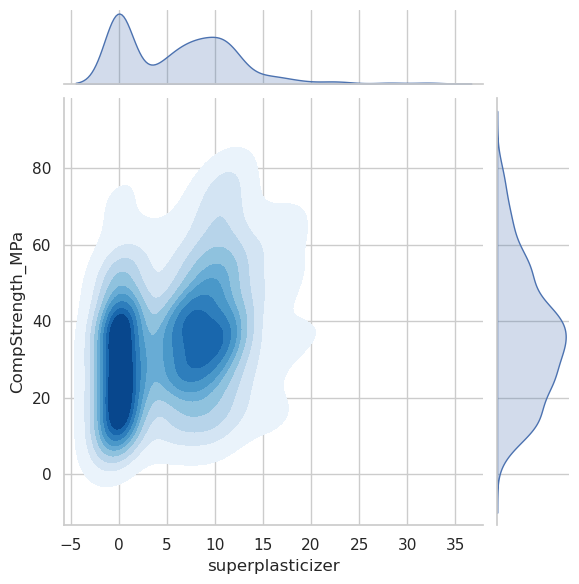

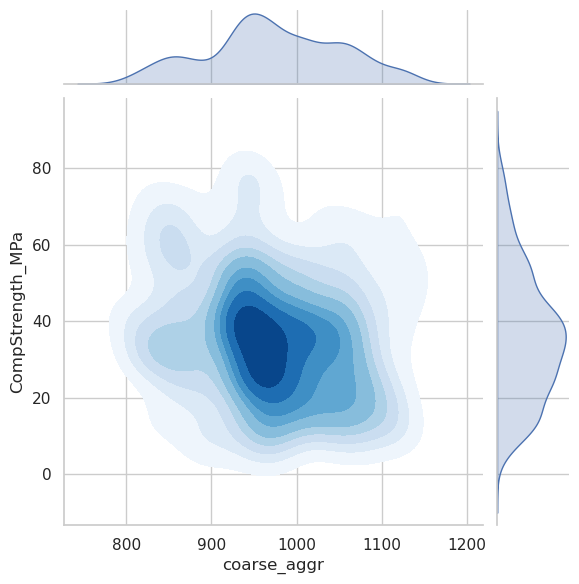

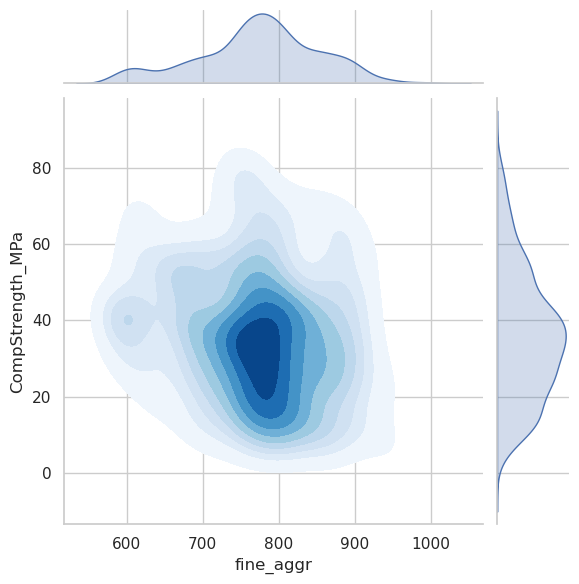

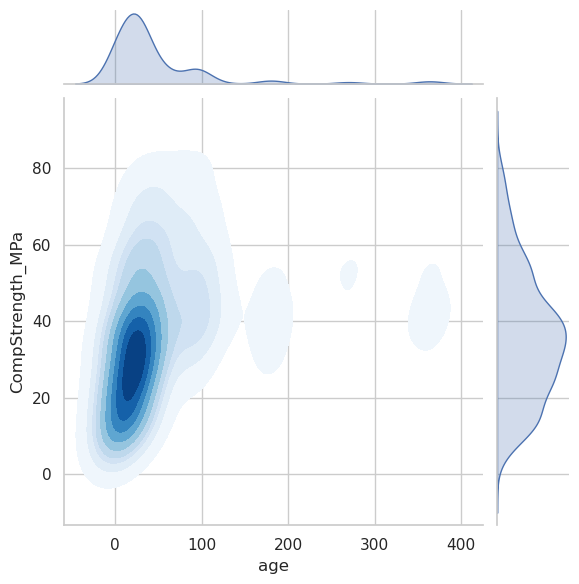

In [88]:
sns.set(style="whitegrid")

cols_without_y = df_concrete.drop("CompStrength_MPa", axis=1).columns
for col in cols_without_y:
    sns.jointplot(x=df_concrete[col], y=df_concrete["CompStrength_MPa"], kind="kde", cmap="Blues", fill=True)
    plt.show()

In [13]:
# split the test and train data
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_concrete, test_size=0.2, random_state=42)

In [14]:
train_set.shape, test_set.shape

((824, 9), (206, 9))

In [15]:
conc_train = train_set.copy()
conc_train

,cement,slag,flyash,water,superplasticizer,coarse_aggr,fine_aggr,age,CompStrength_MPa
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28,27.68
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28,62.05
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3,23.80
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28,33.40
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3,7.40
...,...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3,24.40
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14,42.22
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100,33.56
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28,68.30


In [16]:
conc_train.shape

(824, 9)

In [17]:
# find correlations

corr_matrix = conc_train.corr()
corr_matrix

,cement,slag,flyash,water,superplasticizer,coarse_aggr,fine_aggr,age,CompStrength_MPa
cement,1.000000,-0.292444,-0.408276,-0.079575,0.077144,-0.089068,-0.228866,0.097599,0.496686
slag,-0.292444,1.000000,-0.315814,0.091486,0.055439,-0.287732,-0.251896,-0.051612,0.155159
flyash,-0.408276,-0.315814,1.000000,-0.246652,0.365800,0.000601,0.069946,-0.156821,-0.149749
water,-0.079575,0.091486,-0.246652,1.000000,-0.653785,-0.169772,-0.434564,0.260538,-0.284590
superplasticizer,0.077144,0.055439,0.365800,-0.653785,1.000000,-0.263028,0.217674,-0.180280,0.353292
coarse_aggr,-0.089068,-0.287732,0.000601,-0.169772,-0.263028,1.000000,-0.216624,-0.003823,-0.171612
fine_aggr,-0.228866,-0.251896,0.069946,-0.434564,0.217674,-0.216624,1.000000,-0.147267,-0.158425
age,0.097599,-0.051612,-0.156821,0.260538,-0.180280,-0.003823,-0.147267,1.000000,0.332074
CompStrength_MPa,0.496686,0.155159,-0.149749,-0.284590,0.353292,-0.171612,-0.158425,0.332074,1.000000


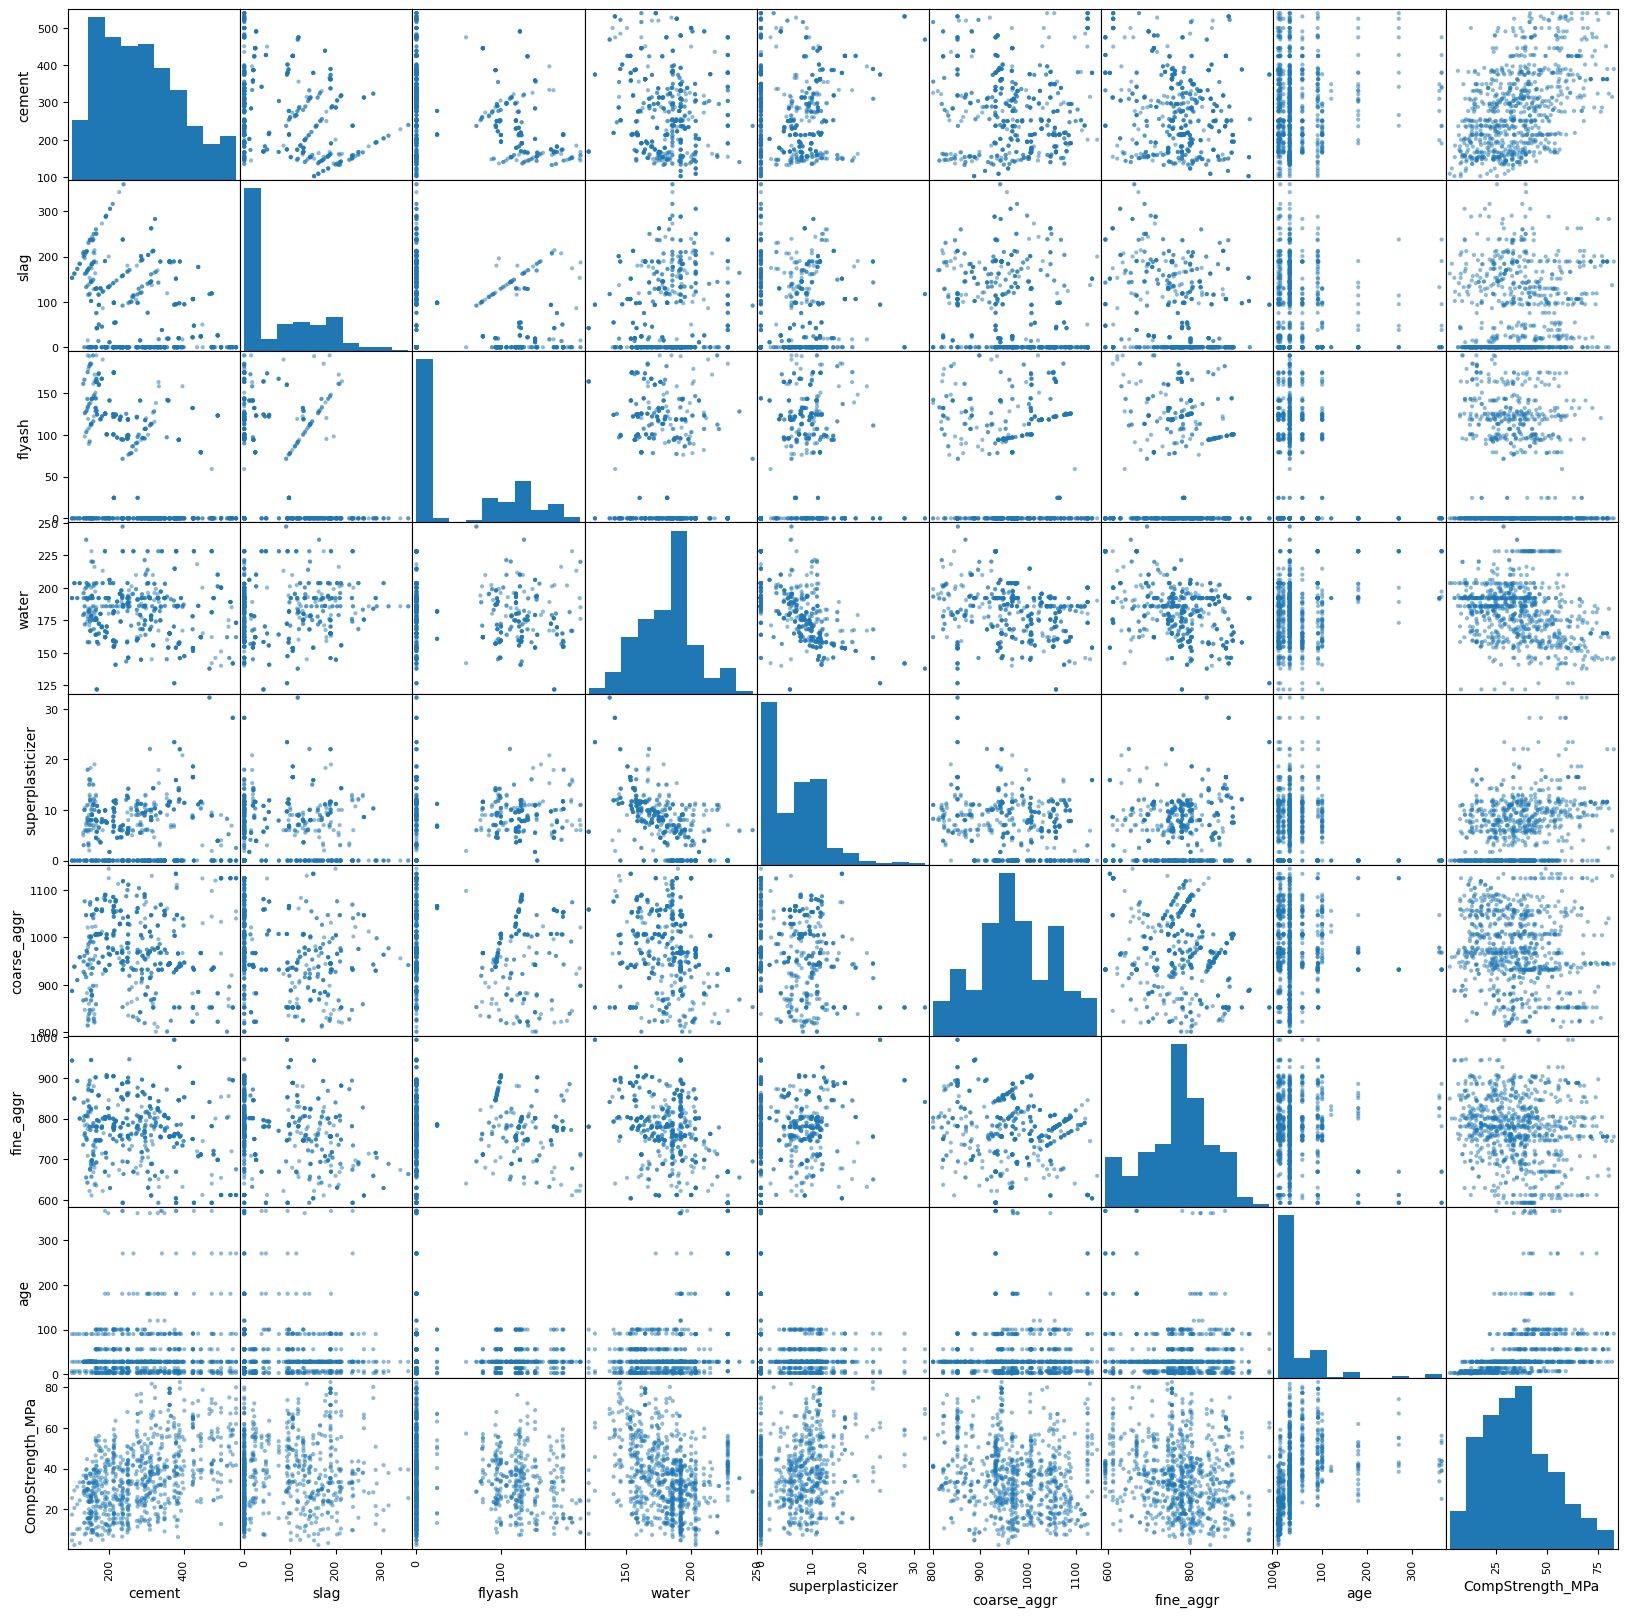

In [18]:
# plot scatter_matrix()

from pandas.plotting import scatter_matrix

scatter_matrix(conc_train, figsize=(20, 20))
plt.show()

In [19]:
# specifically look at how each feature correlates to CompStrength_MPa
corr_matrix['CompStrength_MPa'].sort_values(ascending=False)

CompStrength_MPa    1.000000
cement              0.496686
superplasticizer    0.353292
age                 0.332074
slag                0.155159
flyash             -0.149749
fine_aggr          -0.158425
coarse_aggr        -0.171612
water              -0.284590
Name: CompStrength_MPa, dtype: float64

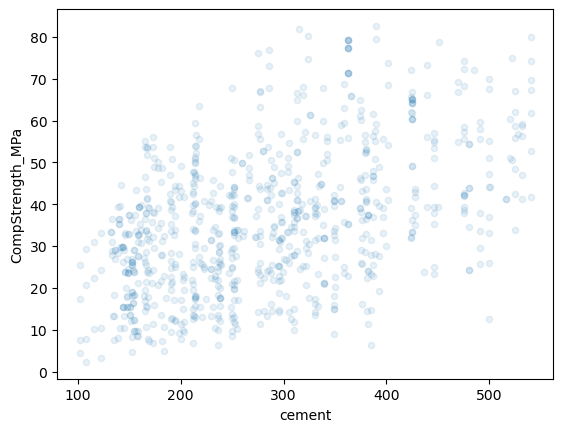

In [20]:
# cement has the highest correlation
conc_train.plot(kind='scatter', x='cement', y='CompStrength_MPa', alpha=0.1)
plt.show()

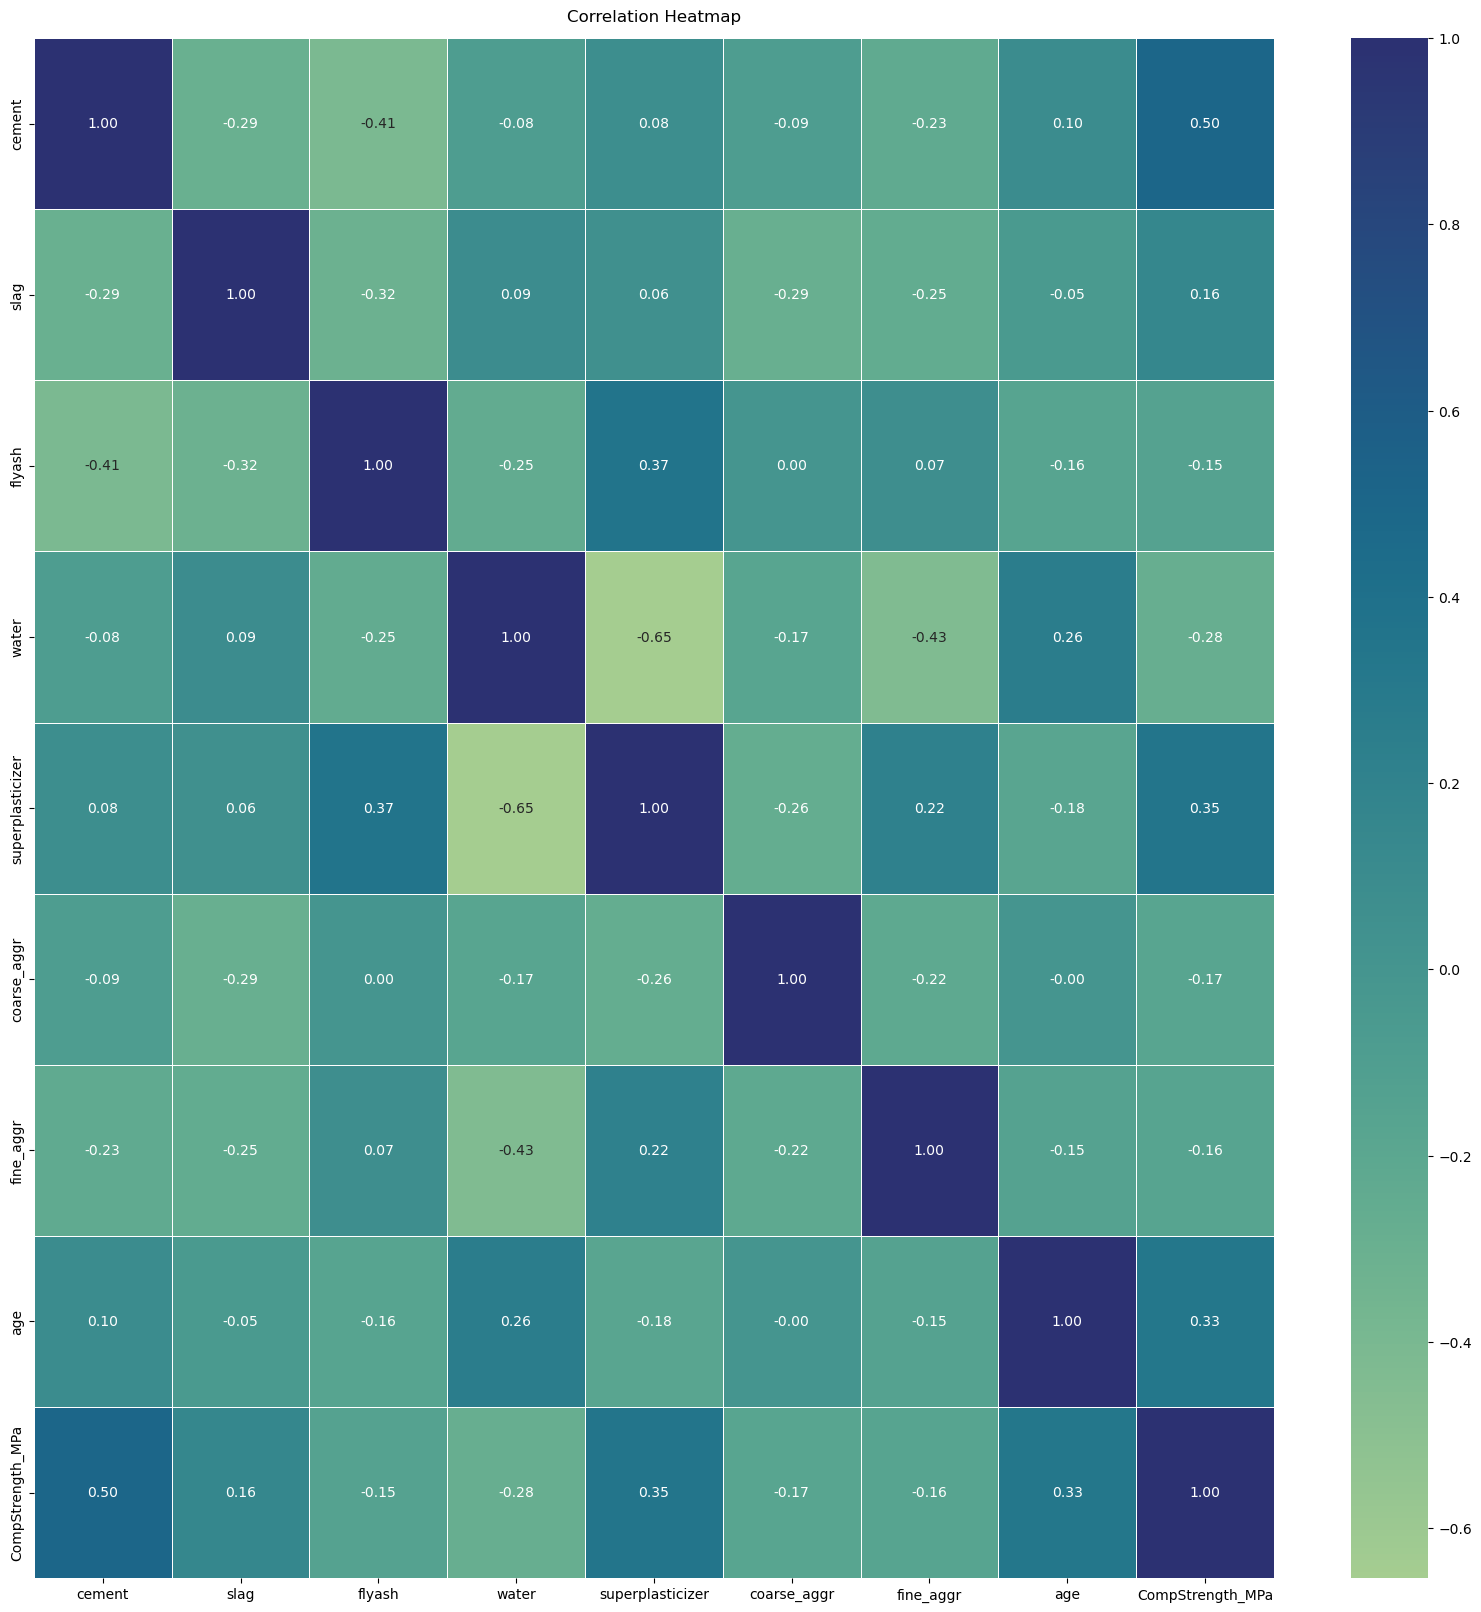

In [21]:
# show heatmap
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='crest', annot=True, fmt='.2f', linewidth=.5)
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

plt.show()

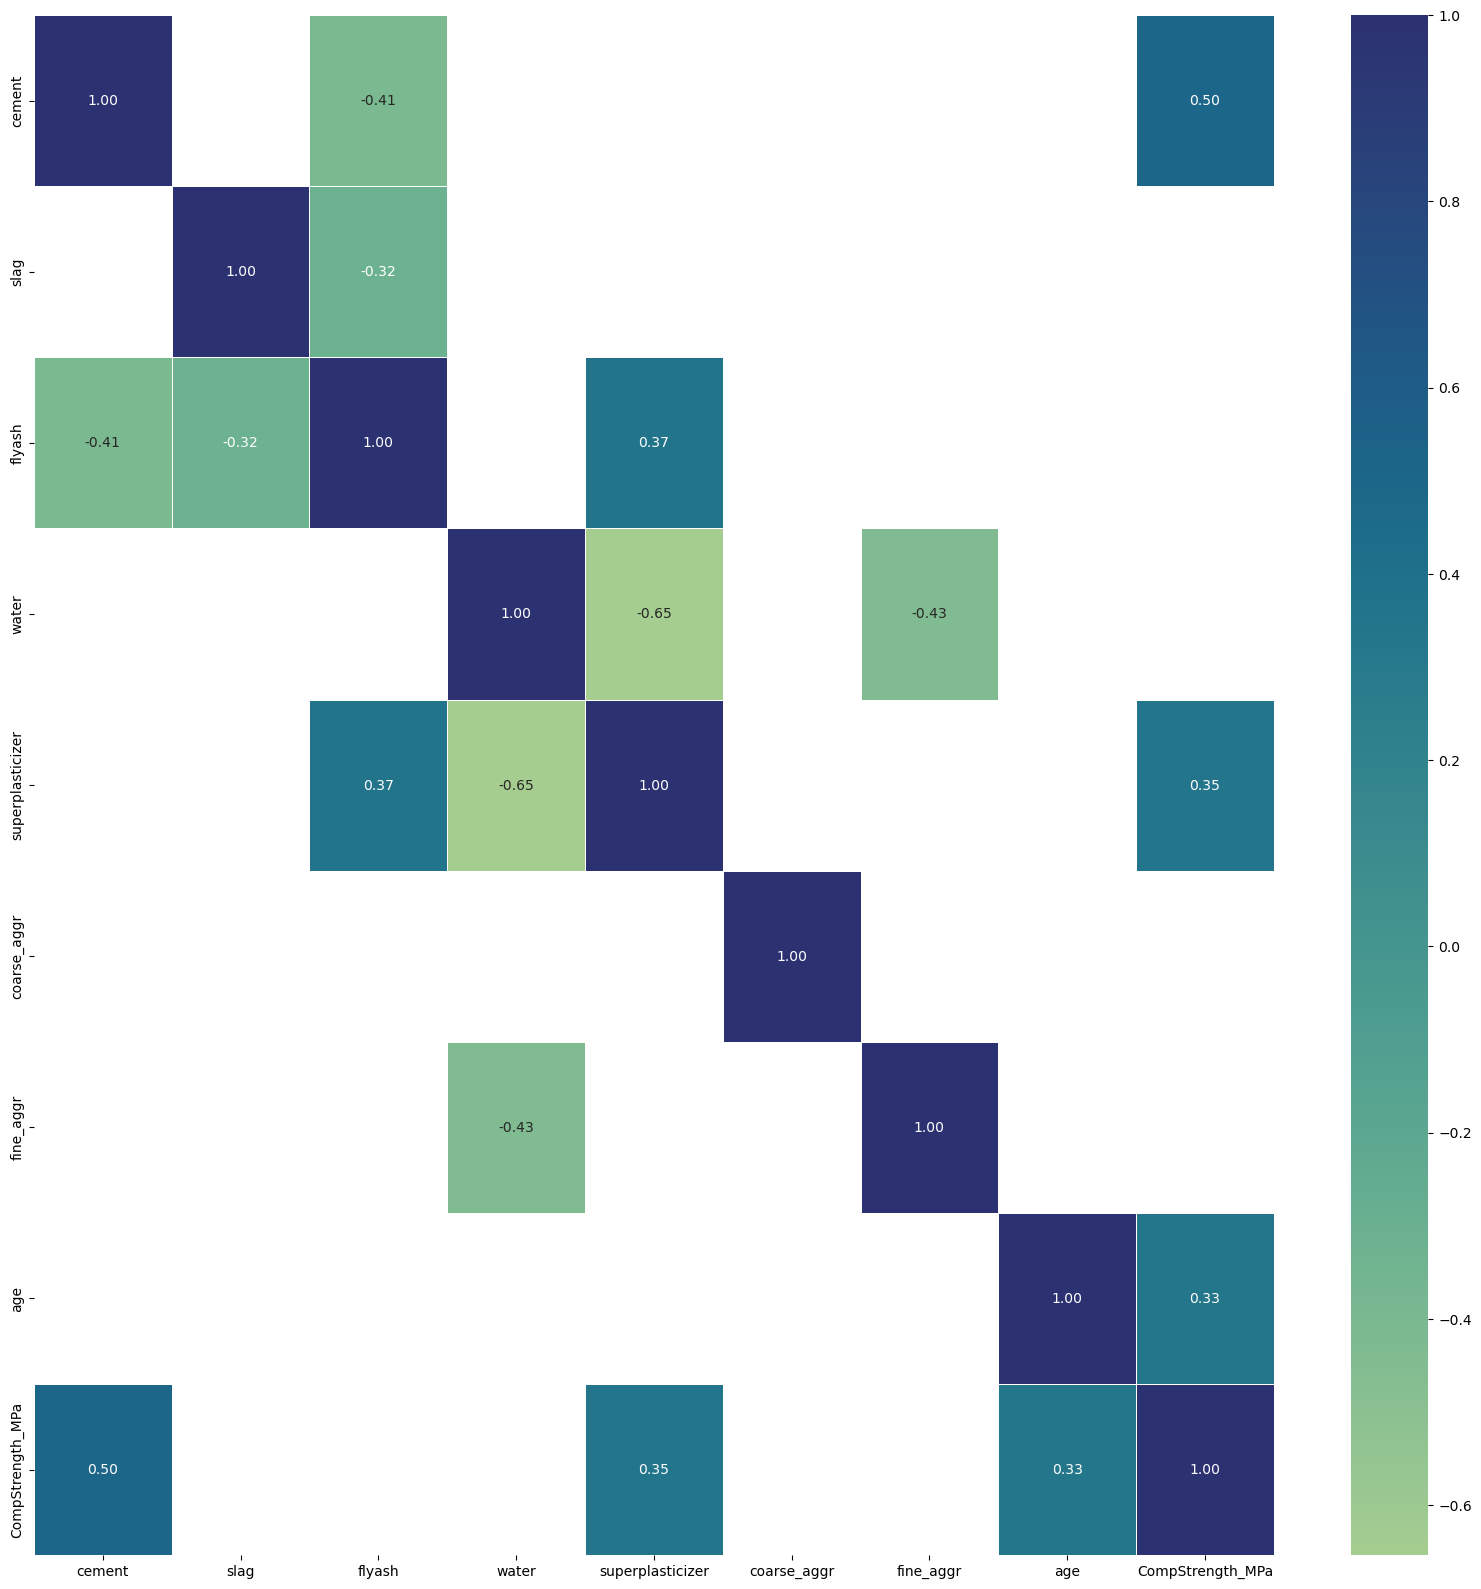

In [22]:
# show only correlation > 0.30
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='crest', annot=True, fmt='.2f', linewidth=.5, mask=(abs(corr_matrix) < 0.3))

plt.show()

In [23]:
conc_train[conc_train == 0]
(conc_train == 0).sum()

cement                0
slag                377
flyash              461
water                 0
superplasticizer    304
coarse_aggr           0
fine_aggr             0
age                   0
CompStrength_MPa      0
dtype: int64

### Experimenting other feature combinations:

- fly ash / cement , -0.41
- fly ash / slag , -0.32
- fly ash / superplasticizer , +0.37
- superplasticizer / water , -0.65
- superplasticizer / CompStrength, +0.35
- age / CompStrength , +0.33
- fine_aggr / water, -0.43

### Explore Expermential features

In [24]:
tr_more_features = conc_train.copy()

In [25]:
tr_more_features["flyash_per_cement"] = tr_more_features["flyash"] / tr_more_features["cement"]
tr_more_features['superplasticizer_per_water'] = tr_more_features['superplasticizer'] / tr_more_features["water"]

tr_more_features['fine_agg_per_water'] = tr_more_features['fine_aggr'] / tr_more_features['water']

tr_more_features

,cement,slag,flyash,water,superplasticizer,coarse_aggr,fine_aggr,age,CompStrength_MPa,flyash_per_cement,superplasticizer_per_water,fine_agg_per_water
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28,27.68,0.731400,0.085665,4.110223
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28,62.05,0.311321,0.047753,4.213483
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3,23.80,0.441294,0.062069,4.874608
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28,33.40,0.301587,0.041237,4.231959
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3,7.40,0.735938,0.068225,5.029690
...,...,...,...,...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3,24.40,0.000000,0.077402,5.554250
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14,42.22,0.506888,0.083740,5.588974
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100,33.56,0.657909,0.059424,4.795318
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28,68.30,0.000000,0.049144,4.315295


In [26]:
corr_matrix_more = tr_more_features.corr()
corr_matrix_more['CompStrength_MPa'].sort_values(ascending=False)

CompStrength_MPa              1.000000
cement                        0.496686
superplasticizer_per_water    0.365144
superplasticizer              0.353292
age                           0.332074
slag                          0.155159
fine_agg_per_water            0.123649
flyash                       -0.149749
fine_aggr                    -0.158425
coarse_aggr                  -0.171612
flyash_per_cement            -0.213169
water                        -0.284590
Name: CompStrength_MPa, dtype: float64

### heatmap

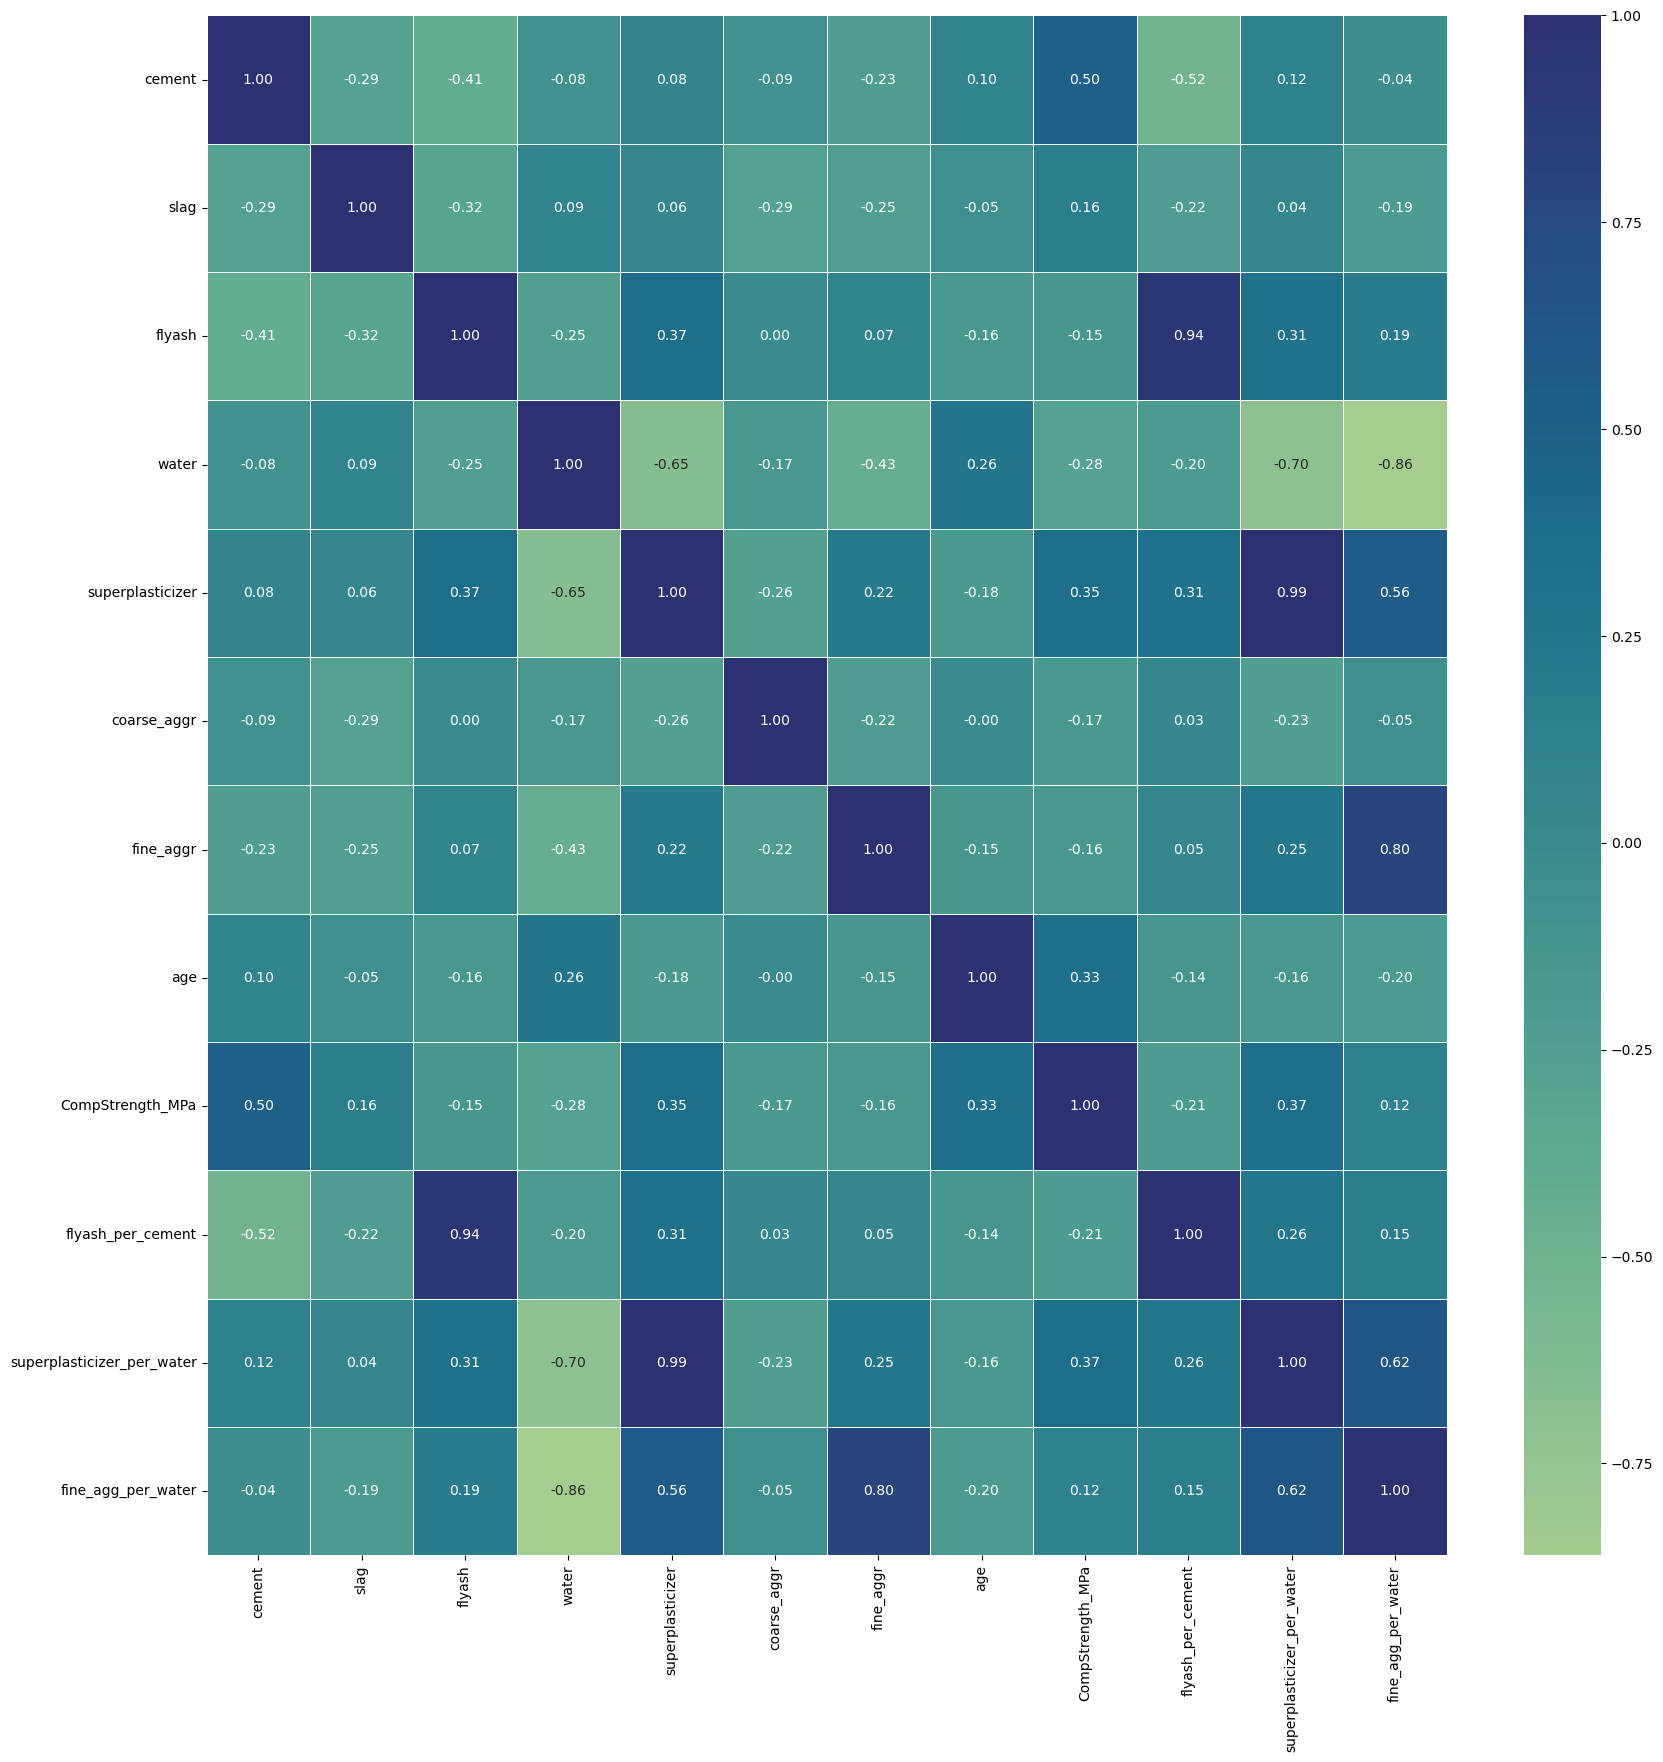

In [27]:
# show heatmap

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix_more, cmap='crest', annot=True, fmt='.2f', linewidth=.5)

plt.show()

### clean, original training dataset 'conc_train'

In [28]:
# separate the feature and target columns

conc_train_features = conc_train.drop('CompStrength_MPa', axis=1) 
conc_train_labels = conc_train["CompStrength_MPa"].copy()

conc_train_features.shape, conc_train_labels.shape

((824, 8), (824,))

### Custom Transformer

In [29]:
# add new cols 
# conc_train["fly_ash_per_cement"] = conc_train['flyash'] / conc_train['cement']

# custom transformer to add new features
from sklearn.base import BaseEstimator, TransformerMixin

flyash_idx, cement_idx, slag_idx =  2, 0, 1
superplasticizer_idx, water_idx = 4, 3
age_idx, fine_aggr_idx = 7, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_experimental_features=True):
        super().__init__()
        self.add_experimental_features = add_experimental_features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.add_experimental_features:
            flyash_per_cement = X[:, flyash_idx] / X[:, cement_idx]
#             flyash_per_slag = X[:, flyash_idx] / X[:, slag_idx]
#             flyash_per_superplasticizer = X[:, flyash_idx] / X[:, superplasticizer_idx]
            superplasticizer_per_water = X[:, superplasticizer_idx] / X[:, water_idx]
            fine_agg_per_water = X[:, fine_aggr_idx] / X[:, water_idx]
            
            return np.c_[X, flyash_per_cement, superplasticizer_per_water,\
                        fine_agg_per_water]
        else:
            return X

attr_adder = CombinedAttributesAdder(add_experimental_features=True)

# ndarray -> nd.array
extra_att_conc_train = attr_adder.transform(conc_train_features.to_numpy()) 

In [30]:
extra_att_conc_train.shape

(824, 11)

In [31]:
"""check for missing values"""
df = pd.DataFrame(extra_att_conc_train)
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

### use pipeline - ColumnTransformer

input: pd.DataFrame

output: nd.array

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([ # a list of tuple
    ('imputer', SimpleImputer(strategy='median')),
    ('attri_adder', CombinedAttributesAdder(True)),
    ('std_scaler', StandardScaler())
], verbose=True)

conc_train_num_pipelined = num_pipeline.fit_transform(conc_train_features)
conc_train_num_pipelined

"""Use ColumnTransformer to transform both numerical and categorical cols"""
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribes = list(conc_train_features)
# cat_attribes = [] # no cat. cols in this data

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribes),
#     ('cat', OneHotEncoder(), cat_attribes)
], verbose=True)

# df.DataFrame -> nd.array
conc_train_prepared = full_pipeline.fit_transform(conc_train_features) # (824, 8)-> (824, 12)


[ColumnTransformer] ........... (1 of 1) Processing num, total=   0.0s


In [33]:
conc_train_features

,cement,slag,flyash,water,superplasticizer,coarse_aggr,fine_aggr,age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


### go through the pipeline

In [34]:
train_features_prepared = full_pipeline.fit_transform(conc_train_features)

[ColumnTransformer] ........... (1 of 1) Processing num, total=   0.0s


### linear regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


lin_reg = LinearRegression()
lin_reg.fit(train_features_prepared, conc_train_labels)


LinearRegression()

In [45]:
# evaluate the performance by checking its RMSE

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

conc_predictions = lin_reg.predict(train_features_prepared)
lin_mse = mean_squared_error(conc_train_labels, conc_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

10.287412369406056


In [92]:
conc_predictions.shape, conc_train_labels.shape


((824,), (824,))

### use cross_val_score

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_rmse(y_label, y_pred):
    return np.sqrt(mean_squared_error(y_label, y_pred))

def calculate_cv_rmse(model, X_prepared=train_features_prepared, y_labels=conc_train_labels, cv=10):
    rmse = np.sqrt(-cross_val_score(model, X_prepared, y_labels, scoring='neg_mean_squared_error', cv=cv))
    return rmse

def calculate_r2(model, X_prepared=train_features_prepared, y_labels=conc_train_labels):
    model.fit(X_prepared, y_labels)
    predictions = model.predict(X_prepared)
    return r2_score(y_labels, predictions)

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR



"""1) linear regression"""
lin_reg = LinearRegression()

"""2) DecisionTreeRegressor"""
tree_reg = DecisionTreeRegressor()

"""3) RandomForestRegressor"""
forest_reg = RandomForestRegressor()

"""4) GradientBoostingRegressor """
gbr = GradientBoostingRegressor(random_state = 1)

"""5) XGBRegressor"""
xgb = XGBRegressor(random_state = 1)


regressors = [lin_reg, tree_reg, forest_reg, gbr, xgb]

get cross_validation scores for each model

In [106]:
def get_performance():
    scores = {}

    for regressor in regressors:
        score = calculate_cv_rmse(regressor)
        r2score = calculate_r2(regressor)
        scores[str(regressor)] = (score.mean(), score.std(), r2score)


    scores_df = pd.DataFrame(scores, index=['rmse_mean', 'rmse_std', 'R-squared'])
#     scores_df.T.sort_values(by=['rmse_mean'], ascending=False)
    return scores_df

scores_df = get_performance()
scores_df.T.sort_values(by=['rmse_mean'], ascending=False)

,rmse_mean,rmse_std,R-squared
LinearRegression(),10.476768,1.086012,0.627469
DecisionTreeRegressor(),6.762488,0.549929,0.996939
GradientBoostingRegressor(random_state=1),5.220762,0.622108,0.950121
RandomForestRegressor(),5.018243,0.633500,0.985784
"XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n early_stopping_rounds=None, enable_categorical=False,\n eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n importance_type=None, interaction_constraints='',\n learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,\n num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,\n reg_lambda=1, ...)",4.701038,0.583251,0.996107


### Fine tune the hyper parameters

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
'''RandomForestRegressor'''
forest_reg = RandomForestRegressor()
param_grid_forest_reg = [
    {'n_estimators':[3,10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False,True], 'n_estimators':[3, 10, 30], 'max_features':[2, 3, 4]},
    {'n_estimators':np.arange(3,50,10), 'bootstrap':[True, False],
        'max_depth':[20, 30, 40], 'max_features':['auto','sqrt','log2'],
        'min_samples_leaf':[2], 'min_samples_split':[6, 8, 10]}
]

grid_search_forest_reg = GridSearchCV(forest_reg, param_grid_forest_reg, cv=5, scoring='neg_mean_squared_error',
                          return_train_score=True, refit=True)
grid_search_forest_reg.fit(train_features_prepared, conc_train_labels)

print(grid_search_forest_reg.best_params_)
regressors.append(grid_search_forest_reg.best_estimator_)

{'bootstrap': False, 'max_features': 4, 'n_estimators': 30}


In [110]:
"""GradientBoostingRegressor GridSearchCV"""
gbr = GradientBoostingRegressor(random_state = 1)
param_grid_gbr = {
                'n_estimators': [160], 
                'max_depth': [4],
                'max_features': ['auto'],
                'learning_rate': np.arange(.1,1,.1),
                'alpha': [0.0001],
                'min_samples_leaf': [2],
                'min_samples_split': np.arange(2,6,1)
              }
grid_search_gbr = GridSearchCV(gbr, param_grid=param_grid_gbr, cv=5, scoring='neg_mean_absolute_error')

grid_search_gbr.fit(train_features_prepared, conc_train_labels)
print(grid_search_gbr.best_params_)
regressors.append(grid_search_gbr.best_estimator_)

{'alpha': 0.0001, 'learning_rate': 0.2, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 160}


In [111]:
"""XGBoost GridSearchCV"""
xgb = XGBRegressor(random_state = 1)
param_grid_xgb = {
#               'nthread':[4],
#               'objective':['reg:linear'],
#               'learning_rate': [0.3],
              'max_depth': [4],
#               'min_child_weight': [1],
#               'subsample': [1],
#               'colsample_bytree': np.arange(0.5,1,0.1),
              'n_estimators': [500]
              }
grid_search_xgb = GridSearchCV(xgb, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_absolute_error')
grid_search_xgb.fit(train_features_prepared, conc_train_labels)
print(grid_search_xgb.best_params_)
regressors.append(grid_search_xgb.best_estimator_)

{'max_depth': 4, 'n_estimators': 500}


In [112]:
'''LinearRegression'''
lr = LinearRegression()

param_grid_lr = {
    'fit_intercept':[True, False],
    'copy_X':[True, False]
}

grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='neg_mean_squared_error',
                             return_train_score=True, refit=True)

grid_search_lr.fit(train_features_prepared, conc_train_labels)
print(grid_search_lr.best_params_)
regressors.append(grid_search_lr.best_estimator_)

{'copy_X': True, 'fit_intercept': True}


## Comparing performance

In [113]:
scores_df = get_performance()
scores_df.T.sort_values(by=['rmse_mean'], ascending=False)

,rmse_mean,rmse_std,R-squared
LinearRegression(),10.476768,1.086012,0.627469
DecisionTreeRegressor(),6.765935,0.644550,0.996939
GradientBoostingRegressor(random_state=1),5.220762,0.622108,0.950121
RandomForestRegressor(),5.053064,0.588665,0.985867
"RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=30)",4.977053,0.508654,0.996939
"XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n early_stopping_rounds=None, enable_categorical=False,\n eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n importance_type=None, interaction_constraints='',\n learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,\n num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,\n reg_lambda=1, ...)",4.701038,0.583251,0.996107
"XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n early_stopping_rounds=None, enable_categorical=False,\n eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n importance_type=None, interaction_constraints='',\n learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,\n missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,\n num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,\n reg_lambda=1, ...)",4.508564,0.607450,0.996559
"GradientBoostingRegressor(alpha=0.0001, learning_rate=0.2, max_depth=4,\n max_features='auto', min_samples_leaf=2,\n min_samples_split=5, n_estimators=160,\n random_state=1)",4.458199,0.610910,0.989860


From the above results, we can see that 

***GradientBoostingRegressor(alpha=0.0001, learning_rate=0.2, max_depth=4,\n max_features='auto', min_samples_leaf=2,\n min_samples_split=5, n_estimators=160,\n random_state=1)***

had the best performance as it has the least rmse and relatively high r2 value.

### Other algorithms could be further tested